In [409]:
import pandas as pd
import numpy as np
data=pd.read_csv('WHR2023.csv')
mapping=pd.read_csv('continents2.csv')


In [410]:
data.loc[data.duplicated()]

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual


In [411]:
data=data.drop(data.loc[:,'Ladder score in Dystopia':'Dystopia + residual'].columns, axis=1)

In [412]:
data.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379


In [413]:
data=data.drop(data.loc[:,'Standard error of ladder score':'lowerwhisker'].columns,axis=1)

In [414]:
data['rank'] = data['Ladder score'].rank(ascending=False)
data['rank'] = data['rank'].astype(int)

In [415]:
data.head()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,rank
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5


In [416]:
data = data.rename({'Country name':'country','Standard error of ladder score':'standard_error_of_ladder_score'
                                   , 'Ladder score':'happiness_score','Happiness score':'happiness_score'
                                   , 'Logged GDP per capita':'gdp_per_capita','Social support':'social_support'
                                   , 'Healthy life expectancy':'healthy_life_expectancy'
                                   , 'Freedom to make life choices':'freedom_to_make_life_choices'
                                   , 'Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'
                                   , 'Explained by: Freedom to make life choices':'freedom_to_make_life_choices'
                                   , 'Explained by: Generosity':'generosity'
                                   , 'Explained by: Perceptions of corruption':'perceptions_of_corruption'}, axis =1)
data.head()

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5


In [417]:
mapping.head()

,ï»¿name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Ã…land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [418]:
mapping = mapping.drop(['alpha-2'], axis=1)

In [419]:
mapping = mapping.drop(mapping.loc[:,'country-code':'iso_3166-2'].columns, axis=1)
mapping = mapping.drop(mapping.loc[:,'intermediate-region':'intermediate-region-code'].columns, axis=1)

In [420]:
mapping=mapping.rename({'ï»¿name':'name','sub-region':'sub_region'},axis=1)

In [421]:
mapping.head()


,name,alpha-3,region,sub_region
0,Afghanistan,AFG,Asia,Southern Asia
1,Ã…land Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [422]:
mapping = mapping.rename({'name':'country','alpha-3':'iso_alpha','sub-region':'sub_region'}, axis =1)

In [423]:
mapping.head()

,country,iso_alpha,region,sub_region
0,Afghanistan,AFG,Asia,Southern Asia
1,Ã…land Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [424]:
region_happy=data.merge(mapping, on='country', how='left')
region_happy

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,iso_alpha,region,sub_region
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1,FIN,Europe,Northern Europe
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2,DNK,Europe,Northern Europe
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3,ISL,Europe,Northern Europe
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4,ISR,Asia,Western Asia
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,133,NaN,NaN,NaN
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,134,ZWE,Africa,Sub-Saharan Africa
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,135,SLE,Africa,Sub-Saharan Africa
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,136,LBN,Asia,Western Asia


In [425]:
region_happy.isnull().sum()


country                          0
happiness_score                  0
gdp_per_capita                   0
social_support                   0
healthy_life_expectancy          1
freedom_to_make_life_choices     0
generosity                       0
perceptions_of_corruption        0
rank                             0
iso_alpha                       11
region                          11
sub_region                      11
dtype: int64

In [426]:
nan_hle_rows=region_happy[region_happy['healthy_life_expectancy'].isnull()]
nan_hle_rows

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,iso_alpha,region,sub_region
98,State of Palestine,4.908,8.716,0.859,NaN,0.694,-0.132,0.836,99,NaN,NaN,NaN


In [427]:
nan_region_rows=region_happy[region_happy['region'].isnull()]
nan_region_rows

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,iso_alpha,region,sub_region
17,Czechia,6.845,10.611,0.953,69.050,0.903,0.040,0.859,18,NaN,NaN,NaN
26,Taiwan Province of China,6.535,10.797,0.884,69.600,0.804,-0.129,0.681,27,NaN,NaN,NaN
33,Kosovo,6.368,9.359,0.844,65.195,0.861,0.259,0.866,34,NaN,NaN,NaN
70,Bosnia and Herzegovina,5.633,9.616,0.880,67.275,0.746,0.206,0.918,71,NaN,NaN,NaN
81,Hong Kong S.A.R. of China,5.308,10.966,0.817,77.280,0.687,-0.026,0.385,82,NaN,NaN,NaN
85,Congo (Brazzaville),5.267,8.095,0.605,56.850,0.730,-0.004,0.739,86,NaN,NaN,NaN
86,North Macedonia,5.254,9.703,0.805,66.500,0.769,0.131,0.902,87,NaN,NaN,NaN
92,Ivory Coast,5.053,8.576,0.572,55.953,0.733,0.003,0.746,93,NaN,NaN,NaN
98,State of Palestine,4.908,8.716,0.859,NaN,0.694,-0.132,0.836,99,NaN,NaN,NaN
105,Turkiye,4.614,10.307,0.796,68.663,0.475,-0.077,0.795,106,NaN,NaN,NaN


In [428]:

#
#different country names in two files
#


mapping['country'] = mapping['country'].str.replace('Turkey', 'Turkiye', regex=True)
#Palestine, State of ----> State of Palestine
mapping['country'] = mapping['country'].str.replace('Palestine, State of', 'State of Palestine', regex=True)
#Côte D'Ivoire ----> Ivory Coast
mapping['country'] = mapping['country'].str.replace("Côte D'Ivoire", 'Ivory Coast', regex=True)
#Macedonia ----> North Macedonia
mapping['country'] = mapping['country'].str.replace('Macedonia', 'North Macedonia', regex=True)
#Hong Kong ----> Hong Kong S.A.R. of China
mapping['country'] = mapping['country'].str.replace('Hong Kong', 'Hong Kong S.A.R. of China', regex=True)
#Taiwan ----> Taiwan Province of China
mapping['country'] = mapping['country'].str.replace('Taiwan', 'Taiwan Province of China', regex=True)
#Czech Republic ----> Czechia
mapping['country'] = mapping['country'].str.replace('Czech Republic', 'Czechia', regex=True)

In [429]:
#we need to merge it all again
region_happy=data.merge(mapping, on='country', how='left')
region_happy

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,iso_alpha,region,sub_region
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1,FIN,Europe,Northern Europe
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2,DNK,Europe,Northern Europe
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3,ISL,Europe,Northern Europe
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4,ISR,Asia,Western Asia
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,133,NaN,NaN,NaN
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,134,ZWE,Africa,Sub-Saharan Africa
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,135,SLE,Africa,Sub-Saharan Africa
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,136,LBN,Asia,Western Asia


In [430]:
#check if nan dissapeared
nan_region_rows=region_happy[region_happy['region'].isnull()]
nan_region_rows

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,iso_alpha,region,sub_region
33,Kosovo,6.368,9.359,0.844,65.195,0.861,0.259,0.866,34,NaN,NaN,NaN
70,Bosnia and Herzegovina,5.633,9.616,0.880,67.275,0.746,0.206,0.918,71,NaN,NaN,NaN
85,Congo (Brazzaville),5.267,8.095,0.605,56.850,0.730,-0.004,0.739,86,NaN,NaN,NaN
92,Ivory Coast,5.053,8.576,0.572,55.953,0.733,0.003,0.746,93,NaN,NaN,NaN
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,133,NaN,NaN,NaN


In [431]:
#manually updating


#Manually updating region, sub_region and iso code for Kosovo
region_happy.loc[33,'region'] = 'Europe'
region_happy.loc[33,'sub_region'] = 'Southern Europe'
region_happy.loc[33,'iso_alpha'] = 'XXK'

#Manually updating region, sub_region and iso code for Bosnia and Herzegovina
region_happy.loc[70,'region'] = 'Europe'
region_happy.loc[70,'sub_region'] = 'Southern Europe'
region_happy.loc[70,'iso_alpha'] = 'BIH'

#Manually updating region, sub_region and iso code for Congo (Brazzaville)
region_happy.loc[85,'region'] = 'Africa'
region_happy.loc[85,'sub_region'] = 'Sub-Saharan Africa'
region_happy.loc[85,'iso_alpha'] = 'COG'

#Manually updating region, sub_region and iso code for Congo (Kinshasa)
region_happy.loc[132,'region'] = 'Africa'
region_happy.loc[132,'sub_region'] = 'Sub-Saharan Africa'
region_happy.loc[132,'iso_alpha'] = 'COD'

#Manually for Ivory Coast
region_happy.loc[92,'region']='Africa'
region_happy.loc[92,'sub_region']='Sub-Saharan Africa'
region_happy.loc[92,'iso_alpha']='IVC'


In [432]:
region_happy

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,iso_alpha,region,sub_region
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1,FIN,Europe,Northern Europe
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2,DNK,Europe,Northern Europe
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3,ISL,Europe,Northern Europe
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4,ISR,Asia,Western Asia
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5,NLD,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,133,COD,Africa,Sub-Saharan Africa
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,134,ZWE,Africa,Sub-Saharan Africa
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,135,SLE,Africa,Sub-Saharan Africa
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,136,LBN,Asia,Western Asia


In [433]:
region_happy.isnull().sum()

country                         0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
rank                            0
iso_alpha                       0
region                          0
sub_region                      0
dtype: int64

In [434]:
region_happy.loc[region_happy['healthy_life_expectancy'].isnull()]

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank,iso_alpha,region,sub_region
98,State of Palestine,4.908,8.716,0.859,NaN,0.694,-0.132,0.836,99,PSE,Asia,Western Asia


In [435]:
################################################################################################################################################################################################################################################################################################

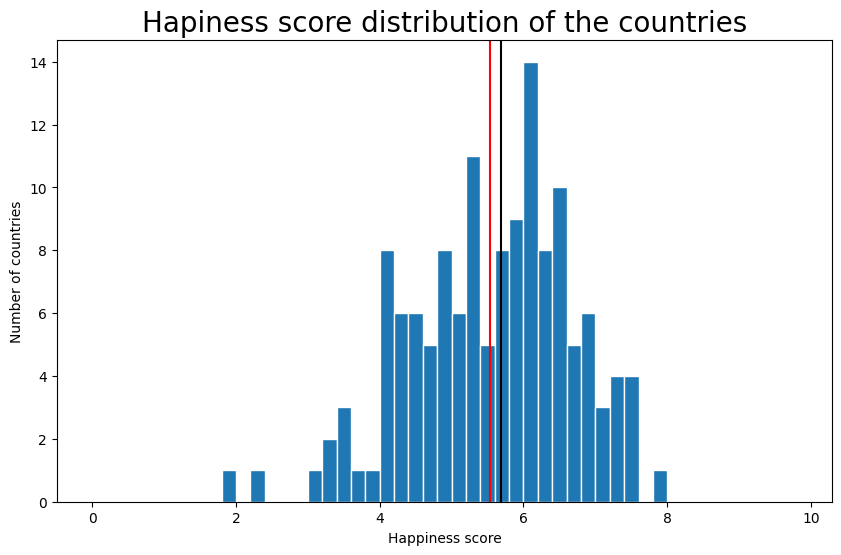

In [436]:
plt.figure(figsize=(10,6))
plt.title("Hapiness score distribution of the countries", fontsize=20)
plt.xlabel('Happiness score')
plt.ylabel('Number of countries')
plt.hist(region_happy.happiness_score,bins=np.arange(0,10,0.2), edgecolor='white')

plt.axvline(x=region_happy['happiness_score'].mean(), color='red')
plt.axvline(x=region_happy['happiness_score'].median(), color='black')

In [437]:
mean_happiness_region=region_happy.groupby('region')[['happiness_score']].mean()
mean_happiness_region=mean_happiness_region.sort_values(by=['happiness_score'],ascending=False)
mean_happiness_region = mean_happiness_region.reset_index()


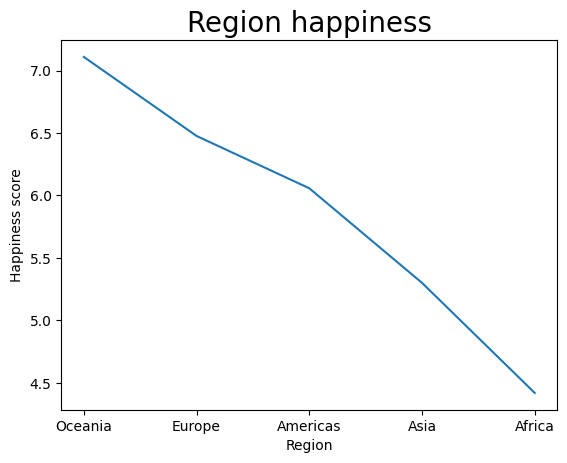

In [438]:
plt.plot(mean_happiness_region['region'], mean_happiness_region['happiness_score'])
plt.title("Region happiness", fontsize=20)
plt.xlabel('Region')
plt.ylabel('Happiness score')

plt.show()

In [439]:
data.head()

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,rank
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5


In [440]:
data = data.rename({'Country name':'country','gdp_per_capita':'economy','freedom_to_make_life_choices':'freedom','perceptions_of_corruption':'coruption','healthy_life_expectancy':'life_length'}, axis =1)
data.head()

,country,happiness_score,economy,social_support,life_length,freedom,generosity,coruption,rank
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5


In [441]:
data.head()

,country,happiness_score,economy,social_support,life_length,freedom,generosity,coruption,rank
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5


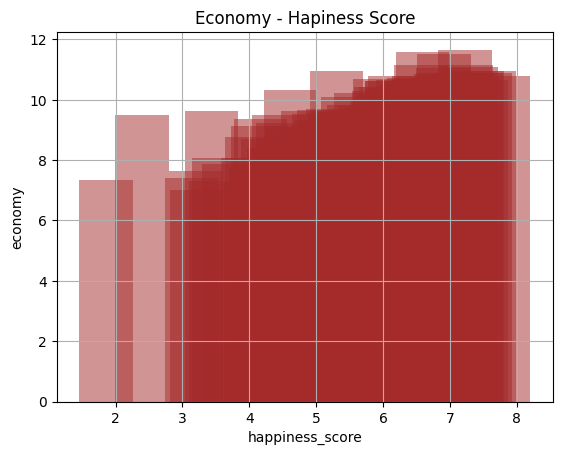

In [442]:
plt.bar(data["happiness_score"], data["economy"], color="brown", alpha=0.5)
plt.xlabel("happiness_score")
plt.ylabel("economy")
plt.title("Economy - Hapiness Score")
plt.grid()
plt.show()

In [443]:
data.head()

,country,happiness_score,economy,social_support,life_length,freedom,generosity,coruption,rank
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5


In [444]:
mapping.head()

,country,iso_alpha,region,sub_region
0,Afghanistan,AFG,Asia,Southern Asia
1,Ã…land Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [445]:
data

,country,happiness_score,economy,social_support,life_length,freedom,generosity,coruption,rank
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,4
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,5
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,133
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,134
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,135
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,136


In [446]:
full_data=pd.merge(data,mapping, on='country')

In [447]:
sub_region_happ=full_data.groupby('sub_region')['happiness_score'].mean()
sub_region_happ = sub_region_happ.reset_index()
sub_region_happ = sub_region_happ.sort_values(by='happiness_score', ascending=True)
print(sub_region_happ)

                         sub_region  happiness_score
9                     Southern Asia         4.201429
11               Sub-Saharan Africa         4.369833
5                   Northern Africa         4.724750
12                     Western Asia         5.353000
8                South-eastern Asia         5.431222
1                      Central Asia         5.828250
2                      Eastern Asia         5.930167
4   Latin America and the Caribbean         5.966053
10                  Southern Europe         6.019273
3                    Eastern Europe         6.024556
6                  Northern America         6.927500
13                   Western Europe         7.054286
7                   Northern Europe         7.076800
0         Australia and New Zealand         7.109000


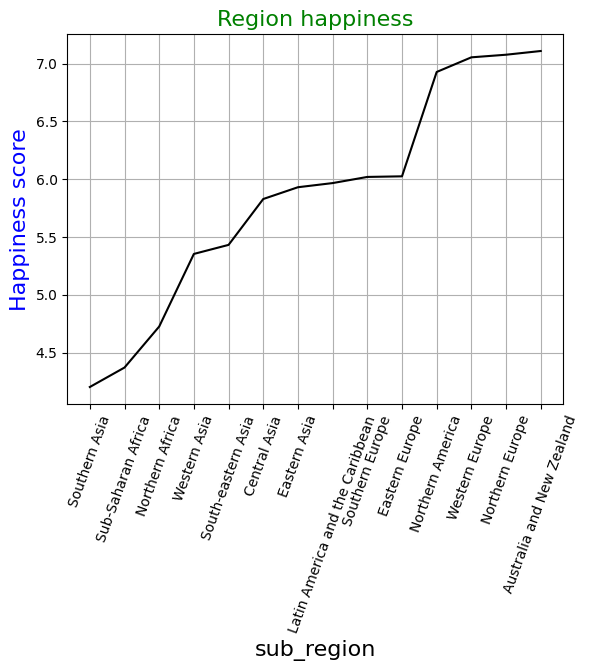

In [448]:
plt.plot(sub_region_happ['sub_region'],sub_region_happ['happiness_score'],color='black')

plt.title("Region happiness", fontsize=16, color='green')
plt.xlabel('sub_region', fontsize=16)
plt.ylabel('Happiness score', fontsize=16, color='blue')
plt.xticks(fontsize=10, rotation=70, color='black')
plt.grid(True)
plt.show()




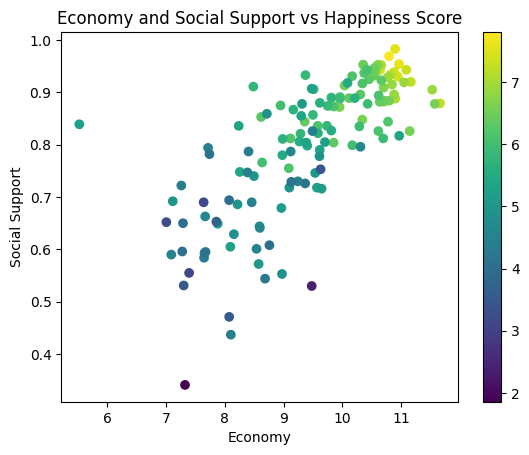

In [449]:
plt.scatter(x='economy', y='social_support', c='happiness_score', data=data)
plt.xlabel('Economy')
plt.ylabel('Social Support')
plt.title('Economy and Social Support vs Happiness Score')
plt.colorbar()

C:\Users\Focus\AppData\Local\Temp\ipykernel_26780\3839562967.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=full_data.corr()


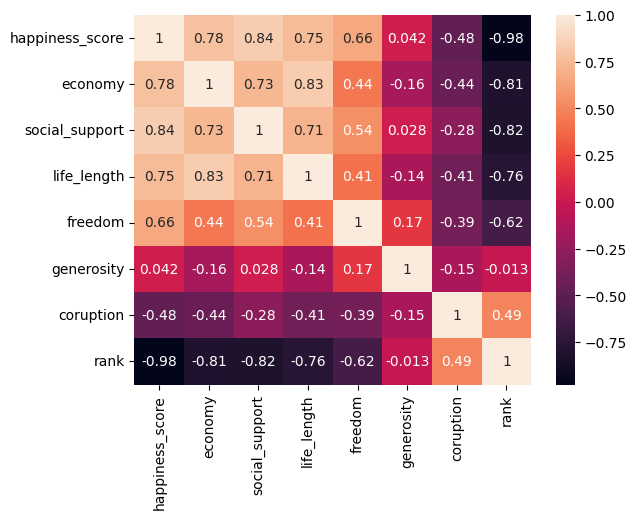

In [450]:
correlation=full_data.corr()
sns.heatmap(correlation,annot=True)
plt.show()

In [451]:
full_data.head()
a=full_data.loc[full_data['life_length'].isna()]
a

,country,happiness_score,economy,social_support,life_length,freedom,generosity,coruption,rank,iso_alpha,region,sub_region
94,State of Palestine,4.908,8.716,0.859,NaN,0.694,-0.132,0.836,99,PSE,Asia,Western Asia


In [452]:

corrdata=pd.DataFrame(corr_matrix)
corrdata=corrdata.reset_index()
corrdata=corrdata.drop(0)
corrdata=corrdata.rename(columns={'index':'type'})
corrdata=corrdata.sort_values(by='happiness_score', ascending=True)

plt.plot(corrdata['type'], corrdata['happiness_score'], color='black')
plt.title("Influence on happiness", fontsize=20)
plt.xlabel('Type')
plt.ylabel('Happiness score')

plt.show()

NameError: name 'corr_matrix' is not defined

In [ ]:
low_happy=full_data.groupby('sub_region')['happiness_score'].min().reset_index()
local_low_happy=pd.merge(low_happy,full_data, on=['sub_region', 'happiness_score'],how='left')

print(local_low_happy[['country','sub_region','happiness_score']])


In [ ]:
plt.scatter(full_data['economy'], full_data['happiness_score'])
plt.xlabel('Economy')
plt.ylabel('Happiness Score')
plt.show()

In [ ]:
#prediction target
full_data.head()
Y=full_data.happiness_score


In [ ]:
data_features=['economy','social_support','life_length','freedom','generosity','coruption']
X = full_data[data_features]
X.describe()
a=X.loc[X['life_length'].isna()]
X=X.drop(X.index[94])
Y=Y.drop(Y.index[94])
#X.dtypes
Y.dtypes




In [ ]:
from sklearn.tree import DecisionTreeRegressor

happiness_model=DecisionTreeRegressor(random_state=1)
happiness_model.fit(X,Y)

In [ ]:
print('Trying first few countries:')
print(X.head())
print('Prediction:')
print(happiness_model.predict(X.head()))

In [453]:
test_values = [9.5, 0.82, 76.2, 0.35, 0.1, 0.25]

In [454]:
full_data.head()
merged_row=pd.DataFrame([test_values],columns=data_features)
#data_features = ['economy', 'social_support', 'life_length', 'freedom', 'generosity', 'coruption']
predicted_score=happiness_model.predict(merged_row)

In [455]:
predicted_country = full_data.loc[(full_data['happiness_score'] - predicted_score).abs().idxmin(), 'country']
print('Predicted country: ',predicted_country)

Predicted country:  North Macedonia
